In [1]:
import pandas as pd
import nltk
import re

In [2]:
file_path = '/Users/shiwei/Desktop/研究论文/一带一路回音室/1993用户情感分析结果.csv'

In [3]:
df = pd.read_csv(file_path)

In [4]:
df

,username,text,sumpopular,neg,neu,pos,compound
0,Kostian_V,Parag Khanna The new Silk Road is made...,0.000000,0.0,1.000,0.000,0.0000
1,SouthCaucasus,The new Silk Road Germany to China rail route...,0.089125,0.0,1.000,0.000,0.0000
2,JamestownTweets,China s Latest Piece of the New Silk Road,0.017643,0.0,1.000,0.000,0.0000
3,ConservaWonk,JamestownEurasia China s Latest Piece of the...,0.000000,0.0,1.000,0.000,0.0000
4,Kostian_V,The Jamestown Foundation China s Latest Pi...,0.000000,0.0,1.000,0.000,0.0000
...,...,...,...,...,...,...,...
272755,ProfJonTaylor,China Hasn t Given Up on the Belt and Road ...,0.000000,0.0,1.000,0.000,0.0000
272756,NamJustus,China Hasn t Given Up on the Belt and Road via,0.019764,0.0,1.000,0.000,0.0000
272757,KleptocracyIntv,Policymakers in developed and emerging economi...,0.048968,0.0,1.000,0.000,0.0000
272758,Brooklynmonk,Beyond the Belt and Road China s Global Econo...,0.000000,0.0,0.928,0.072,0.1779


In [5]:
df["text"] = df["text"].str.lower()  # 统一为小写字母

In [6]:
# 导入nltk的分词工具word_tokenize和nltk的停用词表stopwords，需要自行下载哦
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stopwords_list = stopwords.words("english")

In [7]:
# 定义一个函数，处理Twitter文本中的特殊符号：@xxx、&xxx、网址、多余的空格，最后只保留数字和字母
def clean_specialtext(tweet):
    tweet = re.sub(r"@([^\s:]+)", " ", tweet)  # 去除@提及内容
    tweet = re.sub(r"&([^\s:]+)", " ", tweet)  # 去除&及之后的内容
    tweet = re.sub(r"[a-zA-z]+://[^\s]*", " ", tweet)  # 去除网址
    tweet = re.sub(r"[^0-9A-Za-z]", " ", tweet)  # 仅保留数字及字母
    tweet = re.sub(r"(^\s*)|(\s*$)", "", tweet)  # 去除字符串前后空格
    # tweet = re.sub(r'[^0-9A-Za-z]', ' ', tweet)
    return tweet

In [8]:
# 从 'text' 列中按比例提取数据
random_sample = df['text'].sample(frac=0.1, random_state=42)
# 创建包含随机提取数据的新数据框
df = pd.DataFrame({'text': random_sample})

In [9]:
df["text"] = df["text"].apply(lambda x: clean_specialtext(str(x)))

In [10]:
df

,text
214118,and need a refresher on the taiwan relations...
145089,the belt and road initiative views from washi...
231213,g7 leaders have backed a vast global infrastru...
190171,what does covid 19 mean for china s bri it s ...
84818,the ancient silkroad represented an improveme...
...,...
78851,if bridges pipelines and railroads are the a...
149690,with the mass arbitrary detention of over 1 mi...
169121,china s belt and road initiative with its lof...
90349,is china s belt and road working a progress r...


In [11]:
#导入nltk的词性标注工具pos_tag、词性属性工具wordnet和词形还原工具WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

In [12]:
# 这一步是为了更精确词形还原，对词性进行标注，精确的词性对词形还原很有必要
# 参考https://stackoverflow.com/questions/61982023/using-wordnetlemmatizer-lemmatize-with-pos-tags-throws-keyerror
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith("J"):
        return wordnet.ADJ
    elif treebank_tag.startswith("V"):
        return wordnet.VERB
    elif treebank_tag.startswith("N"):
        return wordnet.NOUN
    elif treebank_tag.startswith("R"):
        return wordnet.ADV
    else:
        return None

In [13]:
# 定义去除停用词和词形还原函数，每一步都是有顺序的，不能乱
def clean_stopwords_Lemmatization(tweet):
    tweet = word_tokenize(tweet)
    # print(tweet)
    # print("*"*100)
    tweet = [word for word in tweet if word not in stopwords_list]  # 去除停用词
    tweet = pos_tag(tweet)  # 词性标注
    # 词性标注好之后，列表里变成了（词，词性）的元组形式，word[0]是词的位置，对word[0]进行词形还原，依据是上面的函数和word[1]
    tweet = [
        lemmatizer.lemmatize(word[0], pos=get_wordnet_pos(word[1]))
        if get_wordnet_pos(word[1]) else word[0] for word in tweet
    ]
    tweet = [word for word in tweet if len(word) > 2]  # 丢弃长度小于等于2的字符串
    tweet = " ".join(tweet)  # 将tweet列表中的字符串重新拼接起来，用空格分隔
    # print(tweet)
    # print("#"*100)
    return tweet

In [14]:
df['text'] = df['text'].apply(lambda x: clean_stopwords_Lemmatization(x))

In [15]:
# 去除冗余信息和处理缺失值
df = df[['text']].drop_duplicates().dropna()

In [16]:
df

,text
214118,need refresher taiwan relation act one china p...
145089,belt road initiative view washington moscow be...
231213,leader back vast global infrastructure plan de...
190171,covid mean china bri far soon know sure way mi...
84818,ancient silkroad represent improvement connect...
...,...
78851,bridge pipeline railroad artery modern world c...
149690,mass arbitrary detention million uyghurs raise...
169121,china belt road initiative lofty plan connect ...
90349,china belt road work progress report eight


In [17]:
# 从 'text' 列中按比例提取数据
random_sample = df['text'].sample(frac=0.5, random_state=42)
# 创建包含随机提取数据的新数据框
df = pd.DataFrame({'text': random_sample})

In [18]:
df

,text
193955,coronavirus imperilling belt road borrower chi...
248402,medium tell look belt road initiative rcep lar...
269007,belt road transform movement good people acros...
46060,chinese foreign guest belt road docking policy...
219041,china drive deep wedge belt road initiative pa...
...,...
128333,700 million amount invest belarus 2011 2017 de...
207161,yep plus nato want russian navy tartu stop dam...
238005,year country along belt road initiative bri in...
151035,lesson china green belt road initiative


In [42]:
# 导入必要的库
import numpy as np

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

创建文本特征向量：
使用TF-IDF（Term Frequency-Inverse Document Frequency）向量化文本数据，将文本数据转换为数值特征。这是一种常用的文本特征提取方法。

In [44]:
# tfidf_vectorizer = TfidfVectorizer(max_features = 5000)  # 可以根据需要调整特征数量
tfidf_vectorizer = TfidfVectorizer()  # 可以根据需要调整特征数量
tfidf_matrix = tfidf_vectorizer.fit_transform(df['text'])

In [45]:
# 数据标准化
scaler = Normalizer()
tfidf_matrix = scaler.fit_transform(tfidf_matrix)

In [46]:
tfidf_matrix.shape # 看数据维度，多少行12562，多少列15029.

(10482, 12991)

选择聚类算法和簇的数量：
选择适当的聚类算法，如K均值聚类，层次聚类或DBSCAN，并确定要分成的簇的数量。这通常需要一些领域知识或通过尝试不同的簇数来确定。

肘部法（Elbow Method）：
肘部法是一种直观的方法，它涉及拟合多个不同簇数的K均值模型，并绘制簇内平方和（inertia）与簇数之间的关系图。然后，找到图中的“肘部”，即图中簇数增加时簇内平方和急剧下降的点。通常，肘部点对应的簇数被认为是最佳的聚类数。
示例代码：

In [47]:
KMeans_inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1 ,n_init='auto')
    kmeans.fit(tfidf_matrix)
    KMeans_inertias.append(kmeans.inertia_)

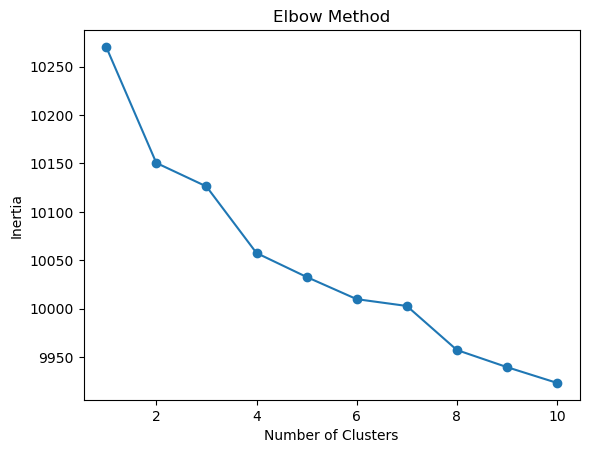

In [48]:
plt.plot(range(1, 11), KMeans_inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

轮廓系数（Silhouette Score）：
轮廓系数是一种用于衡量聚类质量的指标。它考虑了簇内数据点的紧密度和簇间数据点的分离度。最佳聚类数对应于轮廓系数最大的值。
示例代码：

In [26]:
from sklearn.metrics import silhouette_score

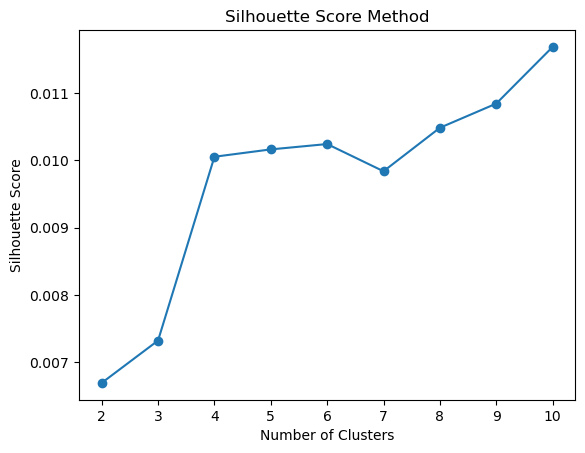

In [27]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=1 ,n_init='auto')
    labels = kmeans.fit_predict(tfidf_matrix)
    silhouette_scores.append(silhouette_score(tfidf_matrix, labels))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

正式开始聚类，选定最终的聚类数目

训练聚类模型：
使用选择的聚类算法和簇的数量来训练聚类模型。

In [63]:
num_clusters = 3  # 你可以根据需求调整簇的数量

kmeans = KMeans(n_clusters=num_clusters, random_state=1 ,n_init='auto')
kmeans.fit(tfidf_matrix)

KMeans(n_clusters=3, n_init='auto', random_state=1)

获取聚类结果：
获取每个数据点所属的簇标签。

In [64]:
cluster_labels = kmeans.labels_

In [65]:
cluster_labels

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

分析和可视化聚类结果：
可以对聚类结果进行分析，查看不同簇的数据点。也可以使用降维技术（如PCA或t-SNE）来可视化数据点在不同簇之间的分布。

分析和可视化聚类结果是了解每个簇的特征和含义的重要步骤。你可以使用降维技术（如PCA或t-SNE）将高维文本数据映射到二维或三维空间，并可视化不同簇的数据点。以下是一个示例代码，演示如何使用PCA来可视化聚类结果：

In [66]:
# 获取PCA降维后的数据
pca = PCA(n_components = 2)  # 2维度的PCA
pca_result = pca.fit_transform(tfidf_matrix.toarray())

In [67]:
# 获取每个数据点的簇标签
cluster_labels = kmeans.labels_

# 将数据点和对应的簇标签合并为一个DataFrame
result_df = pd.DataFrame({'x': pca_result[:, 0], 'y': pca_result[:, 1], 'cluster': cluster_labels})
# result_df = pd.DataFrame({'x': tsne_result[:, 0], 'y': tsne_result[:, 1], 'cluster': cluster_labels})

In [68]:
result_df

,x,y,cluster
0,-0.029100,-0.045924,1
1,-0.041741,-0.077745,1
2,-0.040173,-0.037273,1
3,-0.044895,0.038316,0
4,-0.030165,-0.057952,1
...,...,...,...
10477,-0.029436,-0.028637,1
10478,-0.055115,0.091391,1
10479,-0.053473,-0.007046,1
10480,-0.019736,-0.092398,1


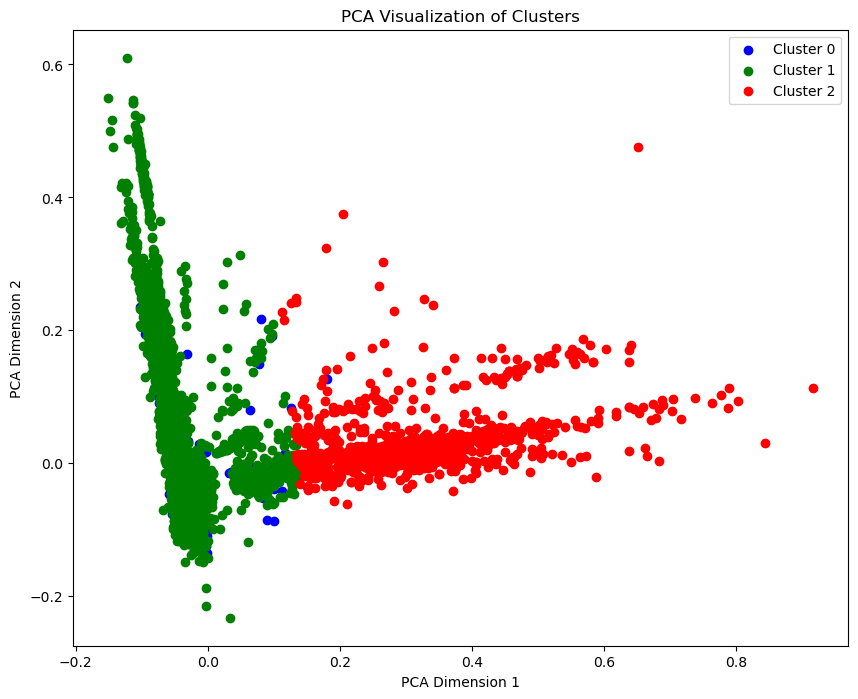

In [69]:
# 可视化聚类结果
plt.figure(figsize=(10, 8))
colors = ['b', 'g', 'r', 'c', 'm']  # 可根据需要调整颜色
for cluster in range(num_clusters):
    cluster_data = result_df[result_df['cluster'] == cluster]
    plt.scatter(cluster_data['x'], cluster_data['y'], c=colors[cluster], label=f'Cluster {cluster}')

plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('PCA Visualization of Clusters')
plt.legend()
plt.show()

# DBSCAN

DBSCAN（Density-Based Spatial Clustering of Applications with Noise）是一种基于密度的聚类算法，可以用于聚类文本数据。下面是使用Python中的scikit-learn库执行DBSCAN聚类的示例代码：

In [49]:
from sklearn.cluster import DBSCAN

In [50]:
# 创建并拟合DBSCAN模型
dbscan = DBSCAN(eps = 0.5, min_samples = 100)  # 调整eps和min_samples参数
dbscan.fit(tfidf_matrix)

DBSCAN(min_samples=100)

In [51]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix.toarray())
result_df = pd.DataFrame({
    'x': pca_result[:, 0],
    'y': pca_result[:, 1],
    'cluster': cluster_labels
})

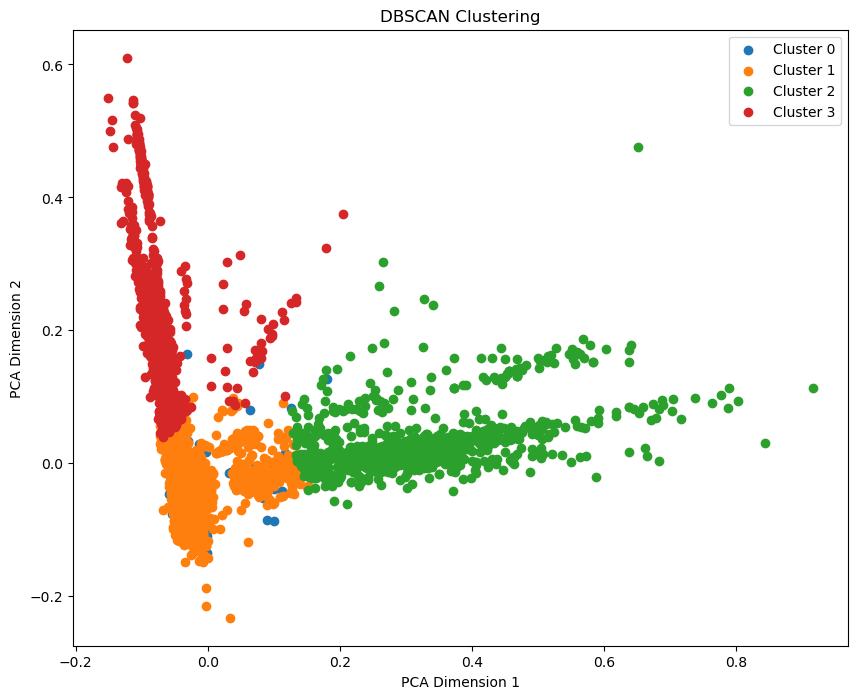

In [52]:
# 绘制簇的分布
plt.figure(figsize=(10, 8))
unique_clusters = set(cluster_labels)
for cluster in unique_clusters:
    if cluster == -1:
        continue  # 跳过噪声点
    cluster_data = result_df[result_df['cluster'] == cluster]
    plt.scatter(cluster_data['x'],
                cluster_data['y'],
                label=f'Cluster {cluster}')

plt.xlabel('PCA Dimension 1')
plt.ylabel('PCA Dimension 2')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()

# 谱聚类（Spectral Clustering）：

In [33]:
from sklearn.cluster import SpectralClustering

In [39]:
# 创建谱聚类模型
# n_clusters： 聚类簇的数量，根据实际情况调整
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', random_state=42)
# 进行谱聚类
df['Cluster'] = spectral.fit_predict(tfidf_matrix)

In [40]:
from sklearn.manifold import TSNE

In [41]:
# 使用t-SNE进行二维降维，以便可视化
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(tfidf_matrix.toarray())

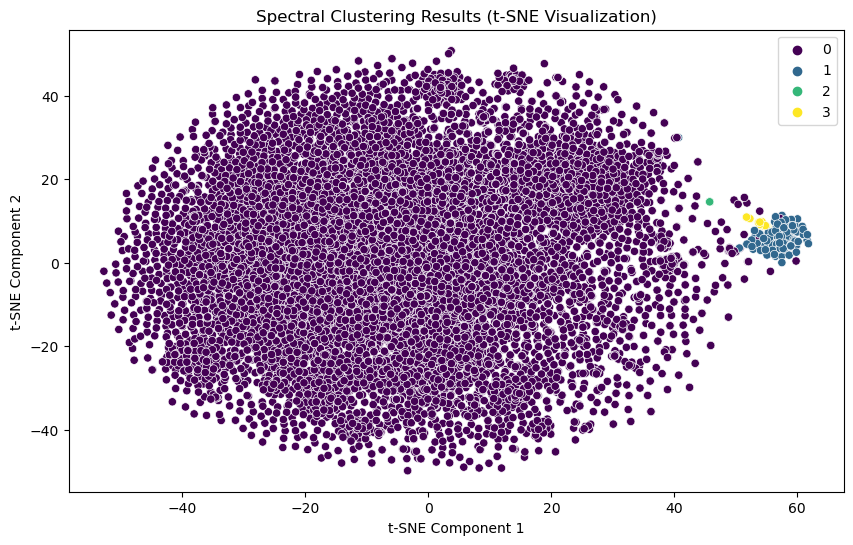

In [43]:
# 设置图形大小
plt.figure(figsize=(10, 6))

# 使用sns.scatterplot绘制散点图，用不同颜色表示聚类结果
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue='Cluster', data=df, palette='viridis', legend='full')

# 添加图形标题和坐标轴标签
plt.title('Spectral Clustering Results (t-SNE Visualization)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')

# 显示图例
plt.legend()

# 显示图形
plt.show()

# LDA主题模型

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [63]:
# 添加自定义停用词
custom_stop_words = ['belt', 'road', 'china', 'silk', 'new', 'initiative', 'bri', 'chinese', 'via']
stop_words = 'english'  # 使用默认英文停用词

# 将默认英文停用词和自定义停用词列表合并成一个新的停用词列表
stop_words = stop_words.split() + custom_stop_words

In [64]:
# 使用CountVectorizer将文本数据转换为词袋表示
vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(df['text'])

In [65]:
# 设置LDA模型参数，这里设置主题数为2
num_topics = 6
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)

In [66]:
# 拟合LDA模型
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

In [67]:
# 输出主题模型的主题-词分布
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))
    print("\n")

Topic #1:
economic pakistan government country cpec australia say deal project corridor


Topic #2:
one asia europe russia global infrastructure india japan plan south


Topic #3:
one daily market energy obor late forum beltandroad hong kong


Topic #4:
country project world debt beijing infrastructure say investment beltandroad trade


Topic #5:
one project beijing cooperation say maritime economic country plan president




In [68]:
# 输出每个文档的主题分布
doc_topic_distribution = lda.transform(X)
df['Topic'] = doc_topic_distribution.argmax(axis=1) + 1
print(df[['text', 'Topic']])

                                                     text  Topic
193955  coronavirus imperilling belt road borrower chi...      2
248402  medium tell look belt road initiative rcep lar...      4
269007  belt road transform movement good people acros...      4
46060   chinese foreign guest belt road docking policy...      3
219041  china drive deep wedge belt road initiative pa...      1
...                                                   ...    ...
128333  700 million amount invest belarus 2011 2017 de...      4
207161  yep plus nato want russian navy tartu stop dam...      1
238005  year country along belt road initiative bri in...      1
151035            lesson china green belt road initiative      4
80139     belt road effort boost malaysia metro news star      1

[10482 rows x 2 columns]


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# 可视化主题-词分布
def visualize_topic_words(lda_model, vectorizer, num_top_words=10):
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words_idx = topic.argsort()[:-num_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        print(f"Topic #{topic_idx + 1}: {', '.join(top_words)}")

In [64]:
# 可视化主题-词分布
visualize_topic_words(lda, vectorizer)

Topic #1: country, sign, cooperation, chinese, trade, italy, year, say, join, agreement
Topic #2: one, daily, russia, late, world, obor, thanks, oil, global, ccp
Topic #3: chinese, energy, market, railway, project, high, pakistan, development, port, economic
Topic #4: forum, asia, beijing, via, trade, maritime, beltandroad, cooperation, president, chinese
Topic #5: project, chinese, country, infrastructure, pakistan, debt, india, investment, via, plan


In [65]:
# 可视化文档-主题分布
def visualize_doc_topic_distribution(doc_topic_distribution):
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    sns.histplot(doc_topic_distribution.argmax(axis=1) + 1, bins=range(1, num_topics + 2), kde=False, color='skyblue')
    plt.title('Document Topic Distribution')
    plt.xlabel('Topic')
    plt.ylabel('Number of Documents')
    plt.show()

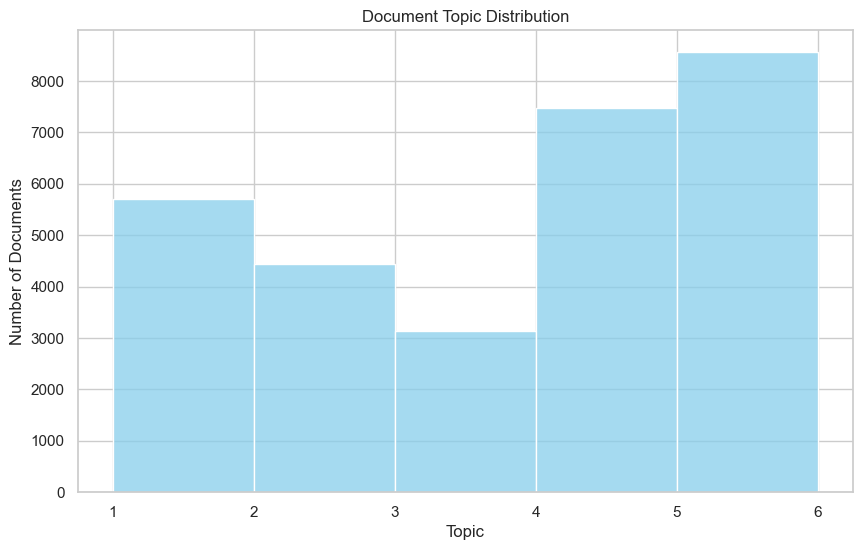

In [66]:
# 可视化文档-主题分布
visualize_doc_topic_distribution(doc_topic_distribution)

# 语义网络分析

In [77]:
import pandas as pd
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [78]:
# 添加自定义停用词
custom_stop_words = ['belt', 'road', 'china', 'silk', 'new', 'initiative', 'bri', 'chinese', 'via']
stop_words = 'english'  # 使用默认英文停用词

# 将默认英文停用词和自定义停用词列表合并成一个新的停用词列表
stop_words = stop_words.split() + custom_stop_words

In [91]:
# 使用TfidfVectorizer进行分词和向量化，限制最大特征数
max_features = 1000  # 设置你希望保留的特征数
vectorizer = TfidfVectorizer(tokenizer=lambda text: text.split(), stop_words=stop_words, max_features=max_features)
X = vectorizer.fit_transform(df['text'])

In [92]:
# 获取词汇表和共现矩阵
vocab = vectorizer.get_feature_names_out()
co_occurrence_matrix = (X.T * X)  # 共现矩阵

In [93]:
len(vocab)

1000

In [94]:
# 创建共现网络图
def create_cooccurrence_network(matrix, vocab):
    G = nx.Graph()
    rows, cols = matrix.nonzero()

    for i, j in zip(rows, cols):
        if i != j:
            word1, word2 = vocab[i], vocab[j]
            weight = matrix[i, j]
            if G.has_edge(word1, word2):
                G[word1][word2]['weight'] += weight
            else:
                G.add_edge(word1, word2, weight=weight)

    return G

In [95]:
# 创建共现网络图
co_occurrence_graph = create_cooccurrence_network(co_occurrence_matrix, vocab)

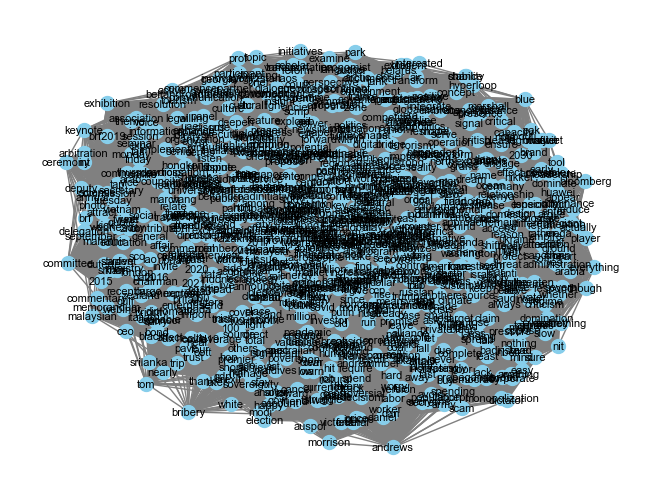

In [96]:
# 绘制网络图
pos = nx.spring_layout(co_occurrence_graph)
nx.draw(co_occurrence_graph, pos, with_labels=True, font_size=8, node_size=100, node_color='blue', font_color='black', edge_color='gray')

In [97]:
nx.density(co_occurrence_graph)

0.4952472472472472

In [98]:
# 导出为GEXF格式
nx.write_gexf(co_occurrence_graph, 'graph.gexf')